In [ ]:
!pip install collection

  Preparing metadata (setup.py) ... done
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5099 sha256=2a0ed0345fa510963293404dce9a4ad784611d1db9d90cdb676f56b00199c841
  Stored in directory: /root/.cache/pip/wheels/a5/70/eb/1d28795e9384ab3b9be6359bdde9e1652f6e7dab9d26844f70
Successfully built collection


In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
data = pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
data.shape

(14640, 15)

In [ ]:
data = data[data['airline_sentiment'] != 'neutral']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24/02/2015 11:13,San Francisco CA,Pacific Time (US & Canada)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11541 entries, 1 to 14638
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      11541 non-null  float64
 1   airline_sentiment             11541 non-null  object 
 2   airline_sentiment_confidence  11541 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     9508 non-null   float64
 5   airline                       11541 non-null  object 
 6   airline_sentiment_gold        37 non-null     object 
 7   name                          11541 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 11541 non-null  int64  
 10  text                          11541 non-null  object 
 11  tweet_coord                   838 non-null    object 
 12  tweet_created                 11541 non-null  object 
 13  t

In [ ]:
print(sorted(Counter(data['airline_sentiment']).items()))

[('negative', 9178), ('positive', 2363)]


In [ ]:
Neg_rev=data[data['airline_sentiment']=='negative']
pos_rev=data[data['airline_sentiment']=='positive']

In [ ]:
print(Neg_rev.shape,pos_rev.shape,data.shape)

(9178, 15) (2363, 15) (11541, 15)


In [ ]:
X = data
Y = data['airline_sentiment']

In [ ]:
X.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
!pip install imblearn

In [ ]:
from imblearn import over_sampling, under_sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_resampled,y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('negative', 9178), ('positive', 9178)] (18356,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state = 0)
X_resampled,y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('negative', 2363), ('positive', 2363)] (4726,)


###Pre-Processing Data

In [ ]:
# noisy removal
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
#stopwords removal
stop = set (stopwords.words ("english"))
def remove_stopwords (text):
  text = [word.lower () for word in text.split() if word.lower() not in stop]
  return " ".join(text)

In [ ]:
data["text"] = data["text"].map(remove_stopwords)

In [ ]:
#words vectorization using tf-idf
vectorizer = TfidfVectorizer (ngram_range=(1,2), max_features=2000, min_df=5, max_df=0.8)
tfidf = vectorizer.fit_transform(data.text)

In [ ]:
#words vectorization usig BoW
count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data = count_vectorizer.fit_transform(data.text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [ ]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'positive' : 1,
    }[sentiment]
T = data.airline_sentiment.apply(sentiment2target)
T

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: airline_sentiment, Length: 11541, dtype: int64

###Averaging Method

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(T)

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

# loading train data set in dataframe from train_data.csv file
df = pd.read_csv("Tweets.csv")

# getting target data from the dataframe
target = df["airline_sentiment"]

# Splitting between train data into training and validation dataset
data_train, data_test, targets_train, targets_test = train_test_split(tfidf,target_encoded, test_size=0.4, random_state=0)
# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# training all the model on the training dataset
model_1.fit(data_train, targets_train)
model_2.fit(data_train, targets_train)
model_3.fit(data_train, targets_train)

# predicting the output on the validation dataset
pred_1 = model_1.predict(data_test)
pred_2 = model_2.predict(data_test)
pred_3 = model_3.predict(data_test)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0

# Calculate and print classification report
print(classification_report(targets_test, pred_final.round()))


# Calculate and print accuracy
accuracy_1 = accuracy_score(targets_test, pred_final.round())
print("Accuracy:", accuracy_1)

# Calculate and print precision
precision = precision_score(targets_test, pred_final.round(), average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(targets_test, pred_final.round(), average='weighted')
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3663
           1       0.83      0.67      0.74       954

    accuracy                           0.90      4617
   macro avg       0.87      0.82      0.84      4617
weighted avg       0.90      0.90      0.90      4617

Accuracy: 0.9021009313406975
Precision: 0.8984598212321797
Recall: 0.9021009313406975


###Max Voting

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing voting classifier
from sklearn.ensemble import VotingClassifier

# loading train data set in dataframe from train_data.csv file
df = pd.read_csv("Tweets.csv")

# getting target data from the dataframe
target = df["airline_sentiment"]

# Splitting between train data into training and validation dataset
data_train, data_test, targets_train, targets_test = train_test_split(tfidf,T, test_size=0.4, random_state=0)

# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(data_train, targets_train)

# predicting the output on the test dataset
pred_final1 = final_model.predict(data_test)

# Calculate and print classification report
print(classification_report(targets_test, pred_final1.round()))


# Calculate and print accuracy
accuracy_2 = accuracy_score(targets_test, pred_final1.round())
print("Accuracy:", accuracy_2)

# Calculate and print precision
precision = precision_score(targets_test, pred_final1.round(), average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(targets_test, pred_final1.round(), average='weighted')
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3663
           1       0.88      0.64      0.74       954

    accuracy                           0.91      4617
   macro avg       0.89      0.81      0.84      4617
weighted avg       0.91      0.91      0.90      4617

Accuracy: 0.9070825211176088
Precision: 0.9051420234219775
Recall: 0.9070825211176088


###Bagging

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing bagging module
from sklearn.ensemble import BaggingRegressor

# loading train data set in dataframe from train_data.csv file
df = pd.read_csv("Tweets.csv")

# getting target data from the dataframe
target = df["airline_sentiment"]

# Splitting between train data into training and validation dataset
data_train, data_test, targets_train, targets_test = train_test_split(tfidf, T, test_size=0.20)

model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

# initializing the bagging model using XGboost as base model with default parameters
model = BaggingRegressor(base_estimator=model_1, n_estimators=10, random_state=42)

# training model
model.fit(data_train, targets_train)

# predicting the output on the test dataset
pred = model.predict(data_test)

# Calculate and print classification report
print(classification_report(targets_test, pred.round()))


# Calculate and print accuracy
accuracy_3 = accuracy_score(targets_test, pred.round())
print("Accuracy:", accuracy_3)

# Calculate and print precision
precision = precision_score(targets_test, pred.round(), average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(targets_test, pred.round(), average='weighted')
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1836
           1       0.92      0.58      0.71       473

    accuracy                           0.90      2309
   macro avg       0.91      0.78      0.83      2309
weighted avg       0.91      0.90      0.90      2309

Accuracy: 0.9038544824599394
Precision: 0.9054906561465303
Recall: 0.9038544824599394


###Boosting

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier

# loading train data set in dataframe from train_data.csv file
df = pd.read_csv("Tweets.csv")

# getting target data from the dataframe
target = df["airline_sentiment"]

# Splitting between train data into training and validation dataset
data_train, data_test, targets_train, targets_test = train_test_split(tfidf, T, test_size=0.20)

model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

# initializing the boosting module with default parameters
model = AdaBoostClassifier(base_estimator= model_1,n_estimators=10, random_state=42)

# training the model on the train dataset
model.fit(data_train, targets_train)

# predicting the output on the test dataset
pred_final2 = model.predict(data_test)

# Calculate and print classification report
print(classification_report(targets_test, pred_final2.round()))


# Calculate and print accuracy
accuracy_4 = accuracy_score(targets_test, pred_final2.round())
print("Accuracy:", accuracy_4)

# Calculate and print precision
precision = precision_score(targets_test, pred_final2.round(), average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(targets_test, pred_final2.round(), average='weighted')
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1853
           1       0.00      0.00      0.00       456

    accuracy                           0.80      2309
   macro avg       0.40      0.50      0.45      2309
weighted avg       0.64      0.80      0.71      2309

Accuracy: 0.8025119099177133
Precision: 0.644025365559776
Recall: 0.8025119099177133


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

###KNORAE

In [ ]:
! sudo pip install deslib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from deslib.des.knora_e import KNORAE

# loading train data set in a DataFrame from train_data.csv file
df = pd.read_csv("Tweets.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Handle missing values with mean imputation
df.fillna(df.mean(), inplace=True)

# Split the data into features and target variable
features = df.drop(columns=["airline_sentiment"])
targets_encoded = df["airline_sentiment"]

data_train, data_test, targets_train, targets_test = train_test_split(features, targets_encoded, test_size=0.3, random_state=42)

# Define the pool of classifiers
lireg = LinearRegression()
xgb = XGBClassifier()
rand = RandomForestClassifier()

lireg.fit(data_train,targets_train)
xgb.fit(data_train,targets_train)
rand.fit(data_train,targets_train)

# Create a KNORA-E model using the specified classifiers
knoa = KNORAE()

# Train the model
knoa.fit(data_train,targets_train)

# Make predictions on the test data
yhat = knoa.predict(data_test)

# Calculate and print confusion matrix, sensitivity, specificity, accuracy, and F1 score
conf_matrix = confusion_matrix(targets_test, yhat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

conf_accuracy = float(TP + TN) / float(TP + TN + FP + FN)
conf_sensitivity = TP / float(TP + FN)
conf_specificity = TN / float(TN + FP)
conf_precision = TP / float(TP + FP)
score = accuracy_score(targets_test, yhat)

print("Sensitivity:", conf_sensitivity)
print("Specificity:", conf_specificity)
print("Accuracy: %.3f" % score)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.844


In [ ]:
model_ev = pd.DataFrame({'Model': ['Averaging Method','Max Voting','Bagging','Boosting','KNORA-E'], 'Accuracy': [accuracy_1,accuracy_2,accuracy_3,accuracy_4,score]})
model_ev

,Model,Accuracy
0,Averaging Method,0.902101
1,Max Voting,0.907083
2,Bagging,0.903854
3,Boosting,0.802512
4,KNORA-E,0.844035


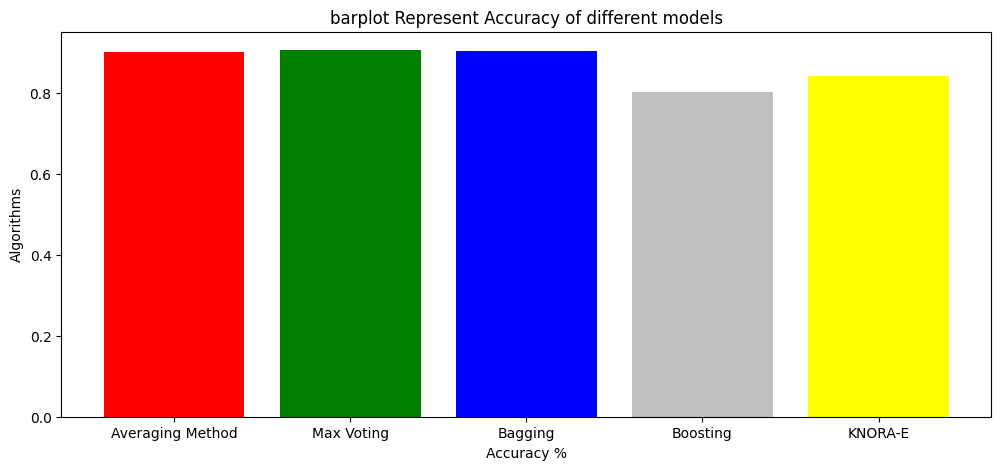

In [ ]:
import matplotlib.pyplot as plt
colors = ['red','green','blue','silver','yellow']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()